Nos basamos en el dataset de Kaggle: [Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability).

Las variables en el dataset son:
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0


In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status, profiling_num,freq_tbl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/home/aylen/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/aylen/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/aylen/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not ava

In [2]:
data=pd.read_csv("/home/aylen/Desktop/DataScience_Bootcamp/semana6/water_potability/data/water_potability.csv")

In [3]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ph,491,0.149878,1,0.000305,2785,float64
1,Hardness,0,0.000000,0,0.000000,3276,float64
2,Solids,0,0.000000,0,0.000000,3276,float64
3,Chloramines,0,0.000000,0,0.000000,3276,float64
4,Sulfate,781,0.238400,0,0.000000,2495,float64
5,Conductivity,0,0.000000,0,0.000000,3276,float64
6,Organic_carbon,0,0.000000,0,0.000000,3276,float64
7,Trihalomethanes,162,0.049451,0,0.000000,3114,float64
8,Turbidity,0,0.000000,0,0.000000,3276,float64
9,Potability,0,0.000000,1998,0.609890,2,int64


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

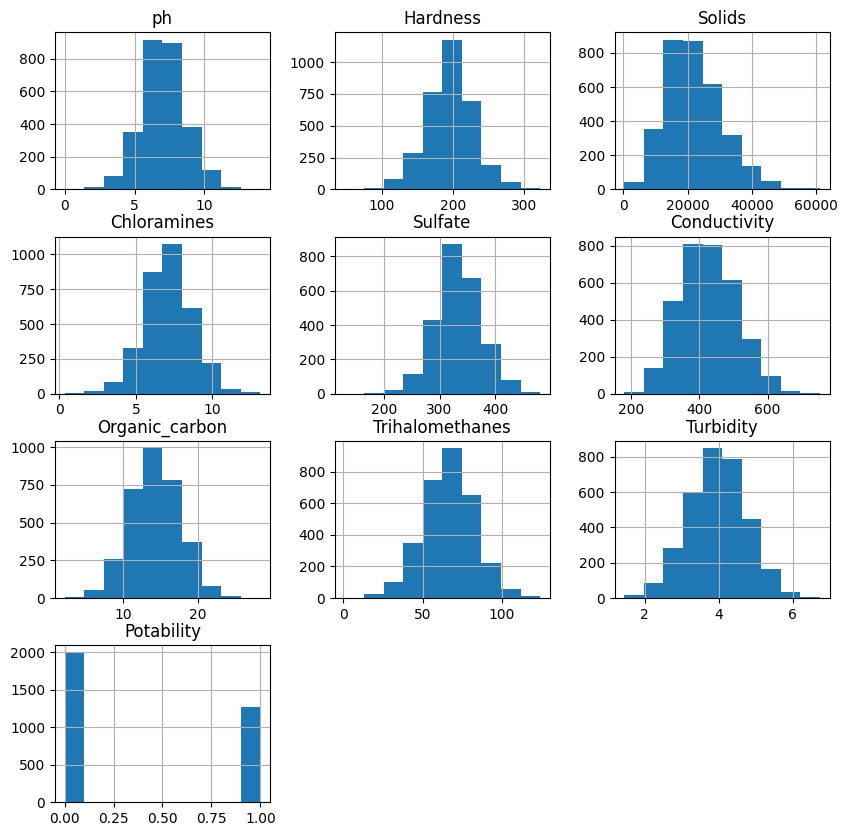

In [4]:
data.hist(figsize = (10,10))

In [5]:
# profiling_num(data)

### 1 Preparacion de los datos

#### 1.1 Manejo de datos faltantes

In [6]:
#Guardamos los datos originales
data1=data.copy()

##### Discretizacion por igual frecuencia de variables numericas con datos faltantes

In [7]:
#Discretizamos las variables que contienen valores faltantes
#Igual frecuencia

data1['ph_cat'],saved_bins_ph=pd.qcut(data1['ph'], q=5,retbins = True)
data1['Trihalomethanes_cat'],saved_bins_Triha=pd.qcut(data1['Trihalomethanes'], q=5,retbins = True)
data1['Sulfate_cat'],saved_bins_Sulf=pd.qcut(data1['Sulfate'], q=5,retbins = True)

In [8]:
# data1['ph_cat_f']

In [9]:
# freq_tbl(data1['ph_cat_f'])

Creacion de la categoria 'desconocido' en cada variable discretizada para guardar datos faltantes


In [10]:
#Creacion de la categoria 'desconocido' y Añadimos los NaN a la categoria 'desconocido'
cat_cols=['ph_cat','Trihalomethanes_cat','Sulfate_cat']
for col in cat_cols:
    data1[col]=data1[col].cat.add_categories('desconocido')
    data1[col]=data1[col].fillna(value='desconocido')


In [11]:
# freq_tbl(data1['ph_cat_f'])

In [12]:
#Eliminacion de las columnas orig con datos Nan
data1=data1.drop(['ph','Trihalomethanes','Sulfate'],axis=1)

In [13]:
data1.head(5)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph_cat,Trihalomethanes_cat,Sulfate_cat
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,desconocido,"(79.701, 124.0]","(367.369, 481.031]"
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,"(-0.001, 5.822]","(53.107, 62.656]",desconocido
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,"(7.437, 8.311]","(62.656, 70.446]",desconocido
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,"(8.311, 14.0]","(79.701, 124.0]","(342.095, 367.369]"
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0,"(8.311, 14.0]","(0.737, 53.107]","(301.074, 323.531]"


Hacemos un get dummies porque necesitamos variables numericas para el modelo de RF

In [14]:
data_final=pd.get_dummies(data1, dtype=int)
data_final.head(5)


,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,"ph_cat_(-0.001, 5.822]","ph_cat_(5.822, 6.702]","ph_cat_(6.702, 7.437]",...,"Trihalomethanes_cat_(62.656, 70.446]","Trihalomethanes_cat_(70.446, 79.701]","Trihalomethanes_cat_(79.701, 124.0]",Trihalomethanes_cat_desconocido,"Sulfate_cat_(128.999, 301.074]","Sulfate_cat_(301.074, 323.531]","Sulfate_cat_(323.531, 342.095]","Sulfate_cat_(342.095, 367.369]","Sulfate_cat_(367.369, 481.031]",Sulfate_cat_desconocido
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 2. Creacion del modelo clasificador Random Forest

#### 2.1. Separacion de X e Y

In [15]:
#Separacion de X e Y
data_x=data_final.drop('Potability', axis=1)
data_y=data_final['Potability']

#### 2.2. Separacion de los dataset de training y testing

In [16]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

#### 2.3. Creacion del modelo predictivo

In [17]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators =1000, random_state = 99, min_samples_leaf=55)

Entrenamos el modelo con los datos en el dataset de entrenamiento

In [18]:
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=55, n_estimators=1000, random_state=99)

#### 2.4. Prediccion y validacion del modelo

In [19]:
# En training
pred_tr=rf.predict(x_train)

# En testing
pred_ts=rf.predict(x_test)

##### 2.4.1 Validacion del modelo

In [20]:
from sklearn.metrics import accuracy_score

Training

In [21]:
df_val_tr=pd.DataFrame({'y_train':y_train, 'pred_tr':pred_tr})

In [22]:
accuracy_score(df_val_tr.y_train, df_val_tr.pred_tr, normalize=True)

0.6218927169646751

Testing

In [23]:
df_val_ts=pd.DataFrame({'y_test':y_test, 'pred_ts':pred_ts})

In [24]:
accuracy_score(df_val_ts.y_test, df_val_ts.pred_ts, normalize=True)

0.6154628687690743

#### 2.5 Matriz de confusión y punto de corte
A continuacion exhibimos la matriz de confusion con el punto de corte por defecto (0.5) y luego analizamos cual es el punto de corte adecuado para nuestro modelo.

In [26]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

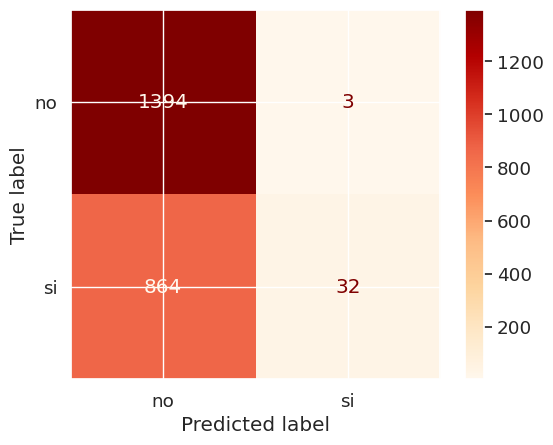

In [27]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

Normalizando por fila

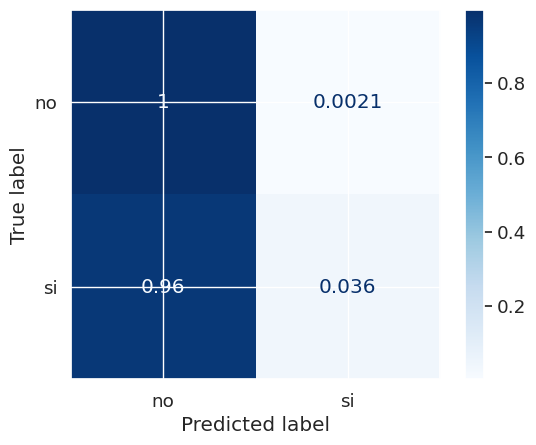

In [28]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

Seteo del punto de corte usando la media

In [29]:
pred_probs=rf.predict_proba(x_train) #matriz de probabilidades: para cada dato del dataset de entrenamiento (row)  tenemos la probabilidad de que el agua no sea potable (col1) y prob de que el agua sea potable (col2)
y_prob_tr=pred_probs[:,1] #probabilidad de potabilidad


In [30]:
y_prob_tr.mean()

0.3907284633531367

Asignacion del label

In [31]:
y_pred2=np.where(y_prob_tr > 0.39, 1, 0)

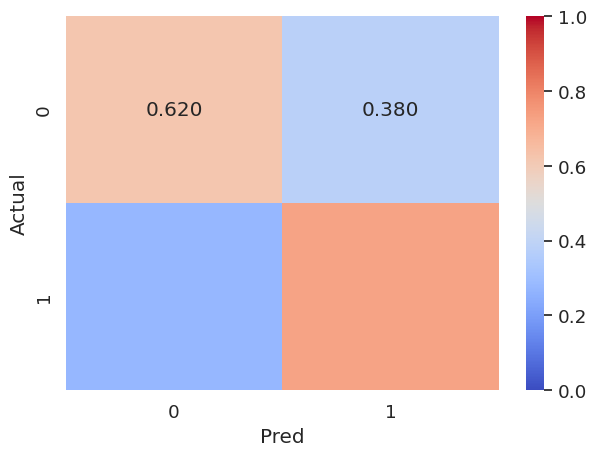

In [32]:
conf_mat=pd.crosstab(index=y_train, 
                    columns=y_pred2,      # ¡cambio!
                    rownames=['Actual'], 
                    colnames=['Pred'], 
                    normalize='index')

sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt='.3f',vmin=0, vmax=1)
plt.tight_layout()
plt.show()



In [33]:
print(conf_mat)

Pred          0        1
Actual                  
0       0.61990  0.38010
1       0.27567  0.72433


Curva ROC

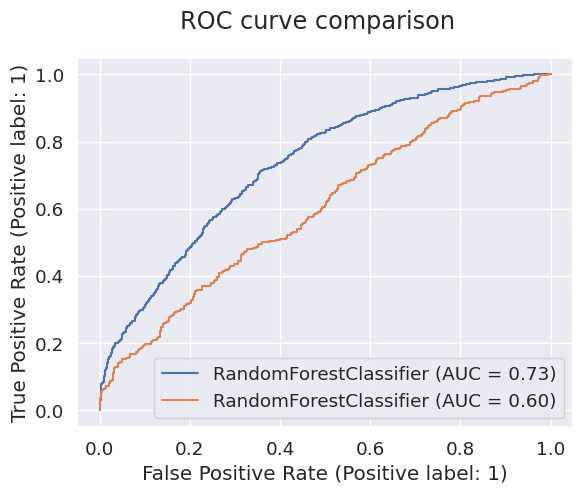

In [34]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

/home/aylen/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


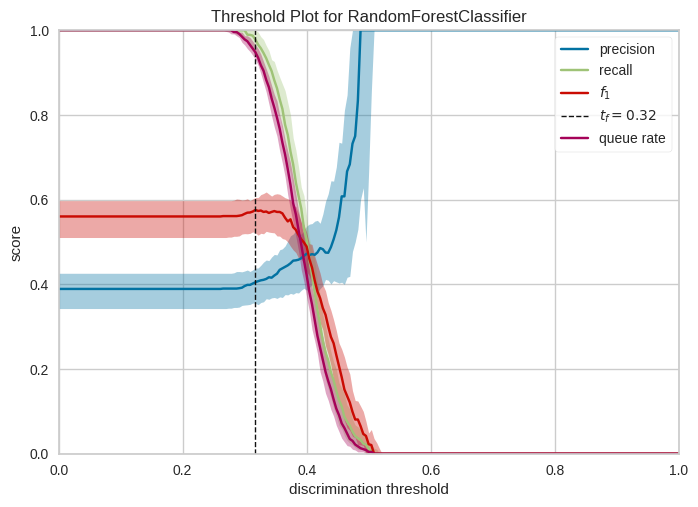

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [51]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()    

Guardado del modelo, columnas ohe y bins

In [39]:
import pickle

# Lo guardamos al disco
filename = '/home/aylen/Desktop/DataScience_Bootcamp/semana6/water_potability/model/rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [40]:
with open('/home/aylen/Desktop/DataScience_Bootcamp/semana6/water_potability/model/categories_ohe.pkl', 'wb') as handle:
        pickle.dump(data_x.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
bins=[saved_bins_ph,saved_bins_Triha,saved_bins_Sulf]
bins_names=['saved_bins_ph','saved_bins_Triha','saved_bins_Sulf']
for b,bn in zip(bins,bins_names):
    name=f"/home/aylen/Desktop/DataScience_Bootcamp/semana6/water_potability/model/{bn}.pkl"
    with open(name,'wb') as handle:
        pickle.dump(b, handle, protocol=pickle.HIGHEST_PROTOCOL)